In [1]:
import numpy as np
import pandas as pd
import string

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AUDRIK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from nltk.corpus import stopwords

In [4]:
df = pd.read_csv('SMS Spam Detector/spam.csv', encoding='ISO-8859-1')

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1308,ham,I jokin oni lar.. ÌÏ busy then i wun disturb Ì_.,NaN,NaN,NaN
5068,ham,Hai dear friends... This is my new &amp; prese...,NaN,NaN,NaN
5464,ham,I will treasure every moment we spend together...,NaN,NaN,NaN
1559,ham,Single line with a big meaning::::: \Miss anyt...,don't miss ur best life for anything... Gud n...,NaN,NaN
1797,ham,Can i get your opinion on something first?,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.sample(5)

,target,text
3961,1,You have been specially selected to receive a ...
319,0,"Coffee cake, i guess..."
3703,0,Kent vale lor... ÌÏ wait 4 me there ar?
2580,1,U are subscribed to the best Mobile Content Se...
4320,0,"K, jason says he's gonna be around so I'll be ..."


In [15]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
df.duplicated().sum()

403

In [17]:
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

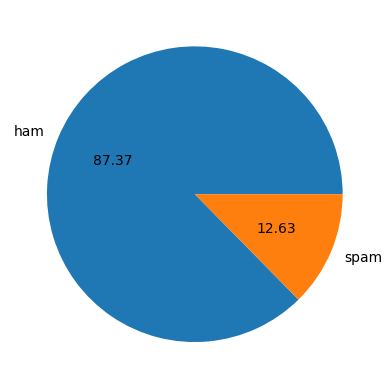

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct = '%0.2f')
plt.show()

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AUDRIK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['alpha_count'] = df['text'].apply(len)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   target       5169 non-null   int32 
 1   text         5169 non-null   object
 2   alpha_count  5169 non-null   int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 141.3+ KB


In [25]:
df.head(5)

,target,text,alpha_count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
#calculating the number of words
df['word_count'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head(5)

,target,text,alpha_count,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['sentence_count'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head(5)

,target,text,alpha_count,word_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
# Real messages
df[df['target'] == 0][['alpha_count', 'word_count', 'sentence_count']].describe() 

,alpha_count,word_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# Spam messages
df[df['target'] == 1][['alpha_count', 'word_count', 'sentence_count']].describe() 

,alpha_count,word_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [32]:
import seaborn as sns

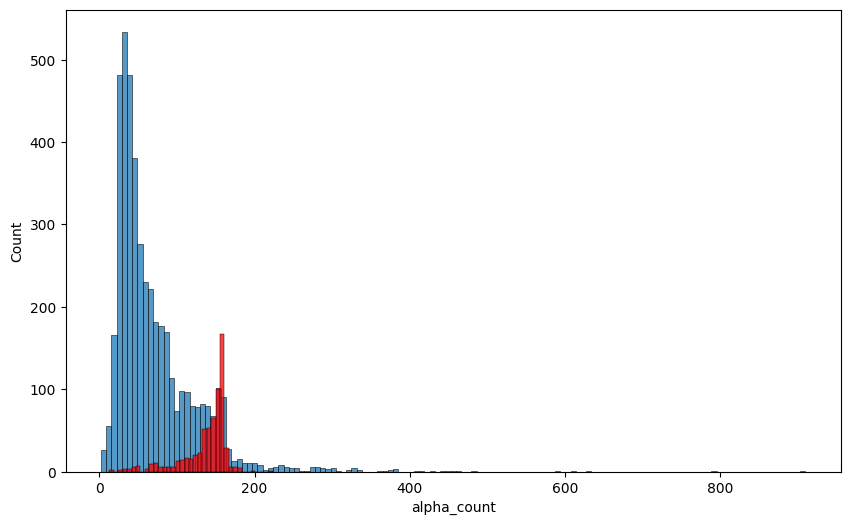

In [33]:
plt.figure(figsize=(10, 6))

# Alphabet count for ham messages
sns.histplot(df[df['target'] == 0]['alpha_count'])

# Alphabet count for spam messages
sns.histplot(df[df['target'] == 1]['alpha_count'], color='red')
plt.show()

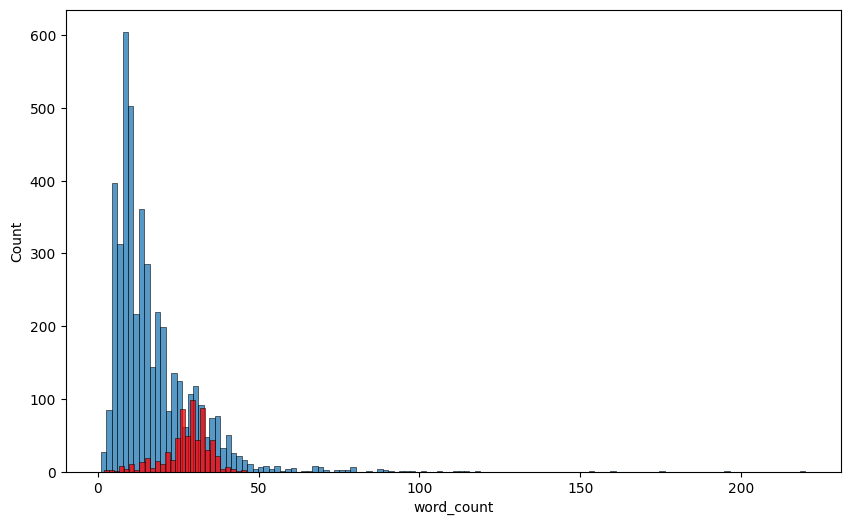

In [34]:
plt.figure(figsize=(10, 6))

# Word count for ham messages
sns.histplot(df[df['target'] == 0]['word_count'])

# Word count for spam messages
sns.histplot(df[df['target'] == 1]['word_count'], color='red')
plt.show()

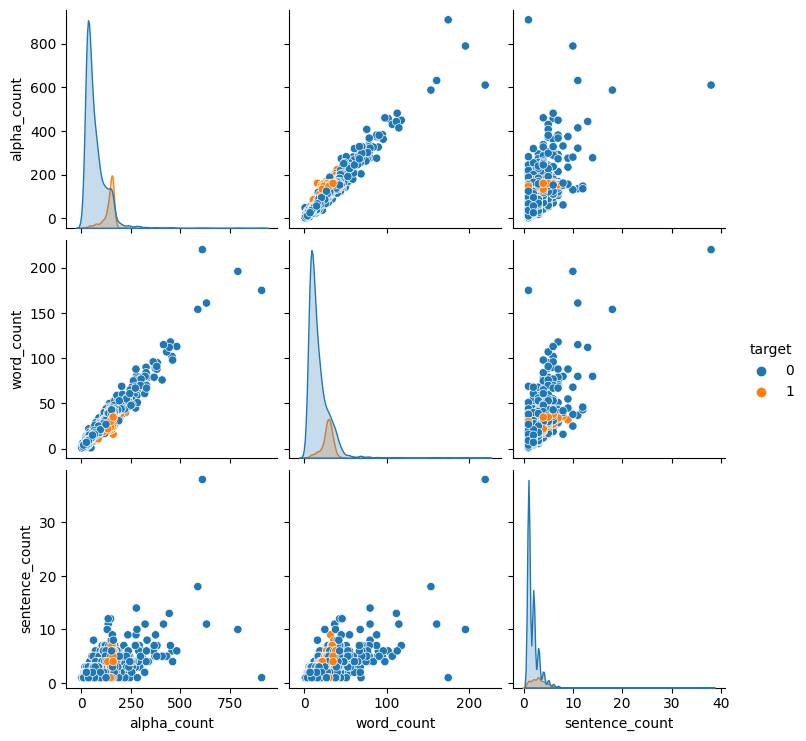

In [35]:
sns.pairplot(df, hue = 'target')
plt.show()

C:\Users\AUDRIK\AppData\Local\Temp\ipykernel_21236\3028576344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<AxesSubplot:>

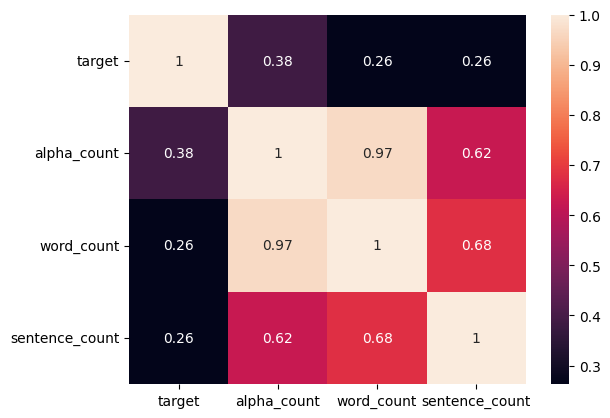

In [36]:
sns.heatmap(df.corr(), annot = True)

In [37]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    #Lower case conversion
    text = text.lower()

    #Splitting the text
    text = nltk.word_tokenize(text)

    #Alnum
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # Removing the connectors
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    #Stemming the data
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [38]:
transform_text("active actives")

'activ activ'

In [39]:
df['transformed_text'] = df['text'].apply(transform_text)

In [40]:
df.head(5)

,target,text,alpha_count,word_count,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [42]:
df[df['target'] == 1]['transformed_text']

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: transformed_text, Length: 653, dtype: object

In [43]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


<AxesSubplot:>

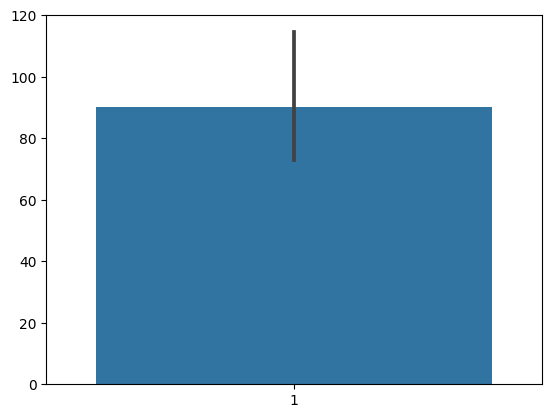

In [44]:
from collections import Counter

sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30)))
# plt.xticks(rotation='vertical')

In [127]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer(max_features = 3000)

In [151]:
X = tf.fit_transform(df['transformed_text']).toarray()

In [152]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [153]:
X.shape

(5169, 3000)

In [154]:
y = df['target'].values

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [157]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [158]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [159]:
gnb.fit(X_train, y_train)
g_pred = gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, g_pred)

In [160]:
print(accuracy_gnb)
print(confusion_matrix(y_test, g_pred))
print(precision_score(y_test, g_pred))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [161]:
mnb.fit(X_train, y_train)
m_pred = mnb.predict(X_test)
accuracy_mnb = accuracy_score(y_test, m_pred)
print(accuracy_mnb)
print(confusion_matrix(y_test, m_pred))
print(precision_score(y_test, m_pred))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [162]:
bnb.fit(X_train, y_train)
b_pred = bnb.predict(X_test)
accuracy_bnb = accuracy_score(y_test, b_pred)
print(accuracy_bnb)
print(confusion_matrix(y_test, b_pred))
print(precision_score(y_test, b_pred))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [165]:
import pickle
pickle.dump(tf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('Multinomial_Classifier.pkl', 'wb'))